# News Article Classification Using Machine Learning

In this project, we will be classifying the vaccines news article and classify them into any of the 5 vaccines
* Covishield
* Covaxin
* Moderna
* Pfizer
* Sputnik V

In [97]:
#Loading the libraries
import pandas as pd

## Reading Each Vaccine Article

### 1. Covaxin

In [98]:
#Reading csv files
covaxin = pd.read_csv('Covaxin Clean Articles.csv')

In [99]:
covaxin.head()

,DOC,NEWSPAPER,Label,Clean_Article
0,RAIPUR: Covaxin has breached the final frontie...,TOI,Covaxin,raipur covaxin breached final frontier chhatti...
1,NEW DELHI: Close on the heels of Brazil sealin...,TOI,Covaxin,new delhi close heel brazil sealing deal secur...
2,NEW DELHI: The government said regular emergen...,TOI,Covaxin,new delhi government said regular emergency us...
3,HYDERABAD: India’s first indigenous Covid-19 v...,TOI,Covaxin,hyderabad india first indigenous covid vaccine...
4,MUMBAI: The Maharashtra government on Wednesda...,TOI,Covaxin,mumbai maharashtra government wednesday raised...


### 2. Covishield

In [100]:
covishield = pd.read_csv('Covishield Clean Articles.csv')

In [101]:
covishield.head()

,DOC,NEWSPAPER,Label,Clean_Article
0,CHENNAI: The Tamil Nadu government doctors ass...,TOI,Covishield,chennai tamil nadu government doctor associati...
1,MANGALURU: Dakshina Kannada district is fully ...,TOI,Covishield,mangaluru dakshina kannada district fully prep...
2,CHANDIGARH: The wait is finally over. Punjab o...,TOI,Covishield,chandigarh wait finally punjab tuesday receive...
3,MUMBAI: India may have decided to stick to the...,TOI,Covishield,mumbai india may decided stick day gap two sho...
4,PUNE: Ahead of the vaccination drive against c...,TOI,Covishield,pune ahead vaccination drive coronavirus total...


### 3. Moderna

In [102]:
moderna = pd.read_csv('Moderna Clean Articles.csv')

In [103]:
moderna.head()

,DOC,NEWSPAPER,Label,Clean_Article
0,DETROIT/LOS ANGELES: Distribution of Moderna I...,TOI,Moderna,detroit los angeles distribution moderna inc c...
1,Moderna Inc said on Monday it was informed by ...,TOI,Moderna,moderna inc said monday informed european medi...
2,NEW YORK: Moderna has begun testing its COVID-...,TOI,Moderna,new york moderna begun testing covid vaccine c...
3,Moderna Inc on Thursday received approval from...,TOI,Moderna,moderna inc thursday received approval u food ...
4,WASHINGTON: US manufacturer Moderna on Tuesday...,TOI,Moderna,washington u manufacturer moderna tuesday said...


### 4. Pfizer

In [104]:
pfizer = pd.read_csv('Pfizer Clean Articles.csv')

In [105]:
pfizer.head()

,DOC,NEWSPAPER,Label,Clean_Article
0,Pfizer announced Wednesday that its Covid-19 v...,TOI,Pfizer,pfizer announced wednesday covid vaccine safe ...
1,Pfizer Inc and partner BioNTech SE said on Fri...,TOI,Pfizer,pfizer inc partner biontech se said friday sub...
2,NEW DELHI/MUMBAI: The Indian drug regulator's ...,TOI,Pfizer,new delhi mumbai indian drug regulator subject...
3,SEOUL: North Korean hackers tried to break int...,TOI,Pfizer,seoul north korean hacker tried break computer...
4,NEW DELHI: In a historic moment in the fight a...,TOI,Pfizer,new delhi historic moment fight pandemic brita...


### 5. Sputnik

In [106]:
sputnik = pd.read_csv('Sputnik Clean Articles.csv')

In [107]:
sputnik.head()

,DOC,NEWSPAPER,Label,Clean_Article
0,HYDERABAD: Following the independent Data and ...,TOI,Sputnik,hyderabad following independent data safety mo...
1,Swati.Bharadwaj@timesgroup.com Covid brought n...,TOI,Sputnik,swati bharadwaj timesgroup com covid brought u...
2,NEW DELHI: Russian envoy in New Delhi Nikolay ...,TOI,Sputnik,new delhi russian envoy new delhi nikolay kuda...
3,MOSCOW: Russia's boast in August that it was t...,TOI,Sputnik,moscow russia boast august first country autho...
4,NEW DELHI: It may be some time before Russia’s...,TOI,Sputnik,new delhi may time russia covid vaccine sputni...


**Combining all in one dataframe for further modelling**

In [108]:
#Combined df
vaccines = pd.concat([covaxin,covishield,moderna,pfizer,sputnik])

In [109]:
vaccines.head()

,DOC,NEWSPAPER,Label,Clean_Article
0,RAIPUR: Covaxin has breached the final frontie...,TOI,Covaxin,raipur covaxin breached final frontier chhatti...
1,NEW DELHI: Close on the heels of Brazil sealin...,TOI,Covaxin,new delhi close heel brazil sealing deal secur...
2,NEW DELHI: The government said regular emergen...,TOI,Covaxin,new delhi government said regular emergency us...
3,HYDERABAD: India’s first indigenous Covid-19 v...,TOI,Covaxin,hyderabad india first indigenous covid vaccine...
4,MUMBAI: The Maharashtra government on Wednesda...,TOI,Covaxin,mumbai maharashtra government wednesday raised...


In [110]:
len(vaccines)

3238

### Reordering Columns

In [111]:
#Total columns in dataframe
vaccines.columns

Index(['DOC', 'NEWSPAPER', 'Label', 'Clean_Article'], dtype='object')

In [112]:
columns_to_reorder = ['DOC','Clean_Article','NEWSPAPER','Label']

In [113]:
#Reordering columns
vaccines = vaccines[columns_to_reorder]

In [114]:
vaccines.head()

,DOC,Clean_Article,NEWSPAPER,Label
0,RAIPUR: Covaxin has breached the final frontie...,raipur covaxin breached final frontier chhatti...,TOI,Covaxin
1,NEW DELHI: Close on the heels of Brazil sealin...,new delhi close heel brazil sealing deal secur...,TOI,Covaxin
2,NEW DELHI: The government said regular emergen...,new delhi government said regular emergency us...,TOI,Covaxin
3,HYDERABAD: India’s first indigenous Covid-19 v...,hyderabad india first indigenous covid vaccine...,TOI,Covaxin
4,MUMBAI: The Maharashtra government on Wednesda...,mumbai maharashtra government wednesday raised...,TOI,Covaxin


In [115]:
#Label categories
vaccines['Label'].value_counts()

Pfizer        957
Covaxin       877
Moderna       833
Covishield    384
Sputnik       187
Name: Label, dtype: int64

## Model Building

In [116]:
#Converting Clean Article column to Unicode type (for TFIDF Vectorizer)
vaccines['Clean_Article'] = vaccines['Clean_Article'].astype('str')

### Splitting data into train and test

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
#Creating X and y
X = vaccines['Clean_Article']
y = vaccines['Label']

In [119]:
#Training size -> 80% , Testing size -> 20%
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Creating a Pipeline

In [120]:
#Pipeline
from sklearn.pipeline import Pipeline

In [121]:
#Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents

## ** Naive Bayes Classifier **

In [122]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [123]:
# Classification Model (Naive Bayes):
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

### Fitting the model

In [124]:
#Fitting the model to the data
text_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

### Run predictions

In [125]:
#Predicting the set
predictions_nb = text_clf_nb.predict(X_test)

In [126]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_nb))

[[206   0   0   0   0]
 [ 74   0   1   0   0]
 [ 36   0  76  38   0]
 [ 38   0  51  99   0]
 [ 15   0   4   3   7]]


In [127]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_nb))

              precision    recall  f1-score   support

     Covaxin       0.56      1.00      0.72       206
  Covishield       0.00      0.00      0.00        75
     Moderna       0.58      0.51      0.54       150
      Pfizer       0.71      0.53      0.60       188
     Sputnik       1.00      0.24      0.39        29

    accuracy                           0.60       648
   macro avg       0.57      0.45      0.45       648
weighted avg       0.56      0.60      0.55       648



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions_nb))

0.5987654320987654


## ** Linear SVC **

In [129]:
#Linear Support Vector Classifier
from sklearn.svm import LinearSVC

In [130]:
# Classification Model (Linear SVC):
text_clf_svc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

### Fitting the model

In [131]:
#Fitting the model to the data
text_clf_svc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

### Run predictions

In [132]:
#Predicting the set
predictions_svc = text_clf_svc.predict(X_test)

In [133]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_svc))

[[163  34   2   4   3]
 [ 39  25   7   4   0]
 [  7   9  90  40   4]
 [  8   2  58 119   1]
 [  0   0   0   2  27]]


In [134]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

     Covaxin       0.75      0.79      0.77       206
  Covishield       0.36      0.33      0.34        75
     Moderna       0.57      0.60      0.59       150
      Pfizer       0.70      0.63      0.67       188
     Sputnik       0.77      0.93      0.84        29

    accuracy                           0.65       648
   macro avg       0.63      0.66      0.64       648
weighted avg       0.65      0.65      0.65       648



In [135]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions_svc))

0.654320987654321


## ** Random Forest Classifier **

In [136]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [137]:
# Classification Model (Random Forest):
text_clf_rf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),
])

### Fitting the model

In [138]:
#Fitting the model to the data
text_clf_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

### Run predictions

In [139]:
#Predicting the set
predictions_rf = text_clf_rf.predict(X_test)

In [140]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_rf))

[[172  27   2   2   3]
 [ 52  13   5   5   0]
 [ 12   7  95  35   1]
 [ 15   2  67 103   1]
 [  0   0   4   1  24]]


In [141]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

     Covaxin       0.69      0.83      0.75       206
  Covishield       0.27      0.17      0.21        75
     Moderna       0.55      0.63      0.59       150
      Pfizer       0.71      0.55      0.62       188
     Sputnik       0.83      0.83      0.83        29

    accuracy                           0.63       648
   macro avg       0.61      0.60      0.60       648
weighted avg       0.62      0.63      0.62       648



In [142]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions_rf))

0.6280864197530864


## ** XgBoost Classifier **

In [143]:
import xgboost
from xgboost import XGBClassifier

In [144]:
# Classification Model (XgBoost):
text_clf_xgb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', XGBClassifier()),
])

### Fitting the model

In [145]:
#Fitting the model to the data
text_clf_xgb.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

### Run predictions

In [146]:
#Predicting the set
predictions_xg = text_clf_xgb.predict(X_test)

In [147]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_xg))

[[167  34   0   3   2]
 [ 33  34   3   5   0]
 [  5   8  96  37   4]
 [  4   1  65 116   2]
 [  0   0   0   0  29]]


In [148]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_xg))

              precision    recall  f1-score   support

     Covaxin       0.80      0.81      0.80       206
  Covishield       0.44      0.45      0.45        75
     Moderna       0.59      0.64      0.61       150
      Pfizer       0.72      0.62      0.66       188
     Sputnik       0.78      1.00      0.88        29

    accuracy                           0.68       648
   macro avg       0.67      0.70      0.68       648
weighted avg       0.68      0.68      0.68       648



In [149]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions_xg))

0.6820987654320988


In [150]:
text_clf_xgb

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

## Model Comparison

In [151]:
#Creating dictionary for model scores
model_scores={'Naive Bayes':metrics.accuracy_score(y_test,predictions_nb),
              'Linear SVC':metrics.accuracy_score(y_test,predictions_svc),
             'Random Forest':metrics.accuracy_score(y_test,predictions_rf),
             'XgBoost':metrics.accuracy_score(y_test,predictions_xg)}

In [152]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Naive Bayes,Linear SVC,Random Forest,XgBoost
accuracy,0.598765,0.654321,0.628086,0.682099


<AxesSubplot:>

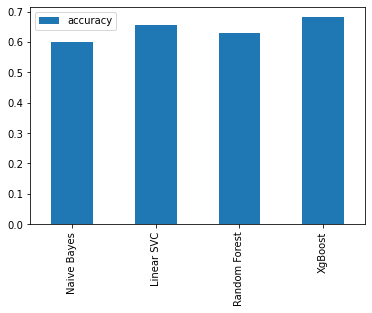

In [153]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

We can see here that XgBoost has performed better than the other model. <br>
So now, we will be hypertuning XgBoost

### HyperParameter Tuning of XgBoost Classifier

In [155]:
#Using Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [156]:
#Param Grid
xgb_params = {
            'clf__learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
            'clf__max_depth'     : [3,4,5,6,8,10,12,15],
            'clf__min_child_weight' : [1,3,5,7],
            'clf__gamma' : [0.0,0.1,0.2,0.3,0.4],
            'clf__colsample_bytree' : [0.3,0.4,0.5,0.7]    
            }

In [158]:
#Randomized Search CV
pipeline = RandomizedSearchCV(
            Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', XGBClassifier()),
                    ]) ,
            xgb_params,n_iter=50,scoring = 'accuracy',cv=5,verbose=2)

In [159]:
#Fitting the pipeline model
pipeline.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.05, clf__gamma=0.3, clf__colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.05, clf__gamma=0.3, clf__colsample_bytree=0.7, total=  16.0s
[CV] clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.05, clf__gamma=0.3, clf__colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s


[10:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.05, clf__gamma=0.3, clf__colsample_bytree=0.7, total=  17.7s
[CV] clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.05, clf__gamma=0.3, clf__colsample_bytree=0.7 
[10:35:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.05, clf__gamma=0.3, clf__colsample_bytree=0.7, total=  19.

[10:39:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=1, clf__max_depth=3, clf__learning_rate=0.3, clf__gamma=0.0, clf__colsample_bytree=0.3, total=   8.4s
[CV] clf__min_child_weight=1, clf__max_depth=3, clf__learning_rate=0.3, clf__gamma=0.0, clf__colsample_bytree=0.3 
[10:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=1, clf__max_depth=3, clf__learning_rate=0.3, clf__gamma=0.0, clf__colsample_bytree=0.3, total=   9.1s
[CV

[10:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=1, clf__max_depth=6, clf__learning_rate=0.25, clf__gamma=0.4, clf__colsample_bytree=0.4, total=  11.0s
[CV] clf__min_child_weight=1, clf__max_depth=6, clf__learning_rate=0.25, clf__gamma=0.4, clf__colsample_bytree=0.4 
[10:43:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=1, clf__max_depth=6, clf__learning_rate=0.25, clf__gamma=0.4, clf__colsample_bytree=0.4, total=  13.0s


[10:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=5, clf__max_depth=10, clf__learning_rate=0.15, clf__gamma=0.3, clf__colsample_bytree=0.3, total=   9.7s
[CV] clf__min_child_weight=5, clf__max_depth=10, clf__learning_rate=0.15, clf__gamma=0.3, clf__colsample_bytree=0.3 
[10:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=5, clf__max_depth=10, clf__learning_rate=0.15, clf__gamma=0.3, clf__colsample_bytree=0.3, total=  11.

[10:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=1, clf__max_depth=3, clf__learning_rate=0.2, clf__gamma=0.0, clf__colsample_bytree=0.5, total=   9.0s
[CV] clf__min_child_weight=1, clf__max_depth=3, clf__learning_rate=0.2, clf__gamma=0.0, clf__colsample_bytree=0.5 
[10:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=1, clf__max_depth=3, clf__learning_rate=0.2, clf__gamma=0.0, clf__colsample_bytree=0.5, total=  10.7s
[CV

[10:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=5, clf__learning_rate=0.1, clf__gamma=0.4, clf__colsample_bytree=0.4, total=  10.4s
[CV] clf__min_child_weight=3, clf__max_depth=5, clf__learning_rate=0.1, clf__gamma=0.4, clf__colsample_bytree=0.4 
[10:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=5, clf__learning_rate=0.1, clf__gamma=0.4, clf__colsample_bytree=0.4, total=   9.1s
[CV

[10:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=3, clf__learning_rate=0.25, clf__gamma=0.4, clf__colsample_bytree=0.3, total=   5.8s
[CV] clf__min_child_weight=3, clf__max_depth=3, clf__learning_rate=0.25, clf__gamma=0.4, clf__colsample_bytree=0.3 
[10:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=3, clf__learning_rate=0.25, clf__gamma=0.4, clf__colsample_bytree=0.3, total=   6.8s


[10:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=15, clf__learning_rate=0.05, clf__gamma=0.1, clf__colsample_bytree=0.7, total=  30.5s
[CV] clf__min_child_weight=3, clf__max_depth=15, clf__learning_rate=0.05, clf__gamma=0.1, clf__colsample_bytree=0.7 
[10:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=15, clf__learning_rate=0.05, clf__gamma=0.1, clf__colsample_bytree=0.7, total=  25.

[11:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=1, clf__max_depth=8, clf__learning_rate=0.25, clf__gamma=0.3, clf__colsample_bytree=0.5, total=  16.0s
[CV] clf__min_child_weight=1, clf__max_depth=8, clf__learning_rate=0.25, clf__gamma=0.3, clf__colsample_bytree=0.5 
[11:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=1, clf__max_depth=8, clf__learning_rate=0.25, clf__gamma=0.3, clf__colsample_bytree=0.5, total=  16.6s


[11:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=15, clf__learning_rate=0.2, clf__gamma=0.3, clf__colsample_bytree=0.5, total=  18.6s
[CV] clf__min_child_weight=3, clf__max_depth=15, clf__learning_rate=0.2, clf__gamma=0.3, clf__colsample_bytree=0.5 
[11:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=15, clf__learning_rate=0.2, clf__gamma=0.3, clf__colsample_bytree=0.5, total=  18.3s


[11:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=12, clf__learning_rate=0.3, clf__gamma=0.3, clf__colsample_bytree=0.4, total=  12.2s
[CV] clf__min_child_weight=7, clf__max_depth=12, clf__learning_rate=0.3, clf__gamma=0.3, clf__colsample_bytree=0.4 
[11:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=12, clf__learning_rate=0.3, clf__gamma=0.3, clf__colsample_bytree=0.4, total=  16.7s


[11:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=10, clf__learning_rate=0.05, clf__gamma=0.1, clf__colsample_bytree=0.5, total=  19.4s
[CV] clf__min_child_weight=3, clf__max_depth=10, clf__learning_rate=0.05, clf__gamma=0.1, clf__colsample_bytree=0.5 
[11:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=3, clf__max_depth=10, clf__learning_rate=0.05, clf__gamma=0.1, clf__colsample_bytree=0.5, total=  18.

[11:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.2, clf__gamma=0.1, clf__colsample_bytree=0.3, total=  11.4s
[CV] clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.2, clf__gamma=0.1, clf__colsample_bytree=0.3 
[11:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.2, clf__gamma=0.1, clf__colsample_bytree=0.3, total=  12.9s


[11:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=10, clf__learning_rate=0.3, clf__gamma=0.3, clf__colsample_bytree=0.5, total=  13.7s
[CV] clf__min_child_weight=7, clf__max_depth=10, clf__learning_rate=0.3, clf__gamma=0.3, clf__colsample_bytree=0.5 
[11:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=10, clf__learning_rate=0.3, clf__gamma=0.3, clf__colsample_bytree=0.5, total=  15.4s


[11:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=5, clf__learning_rate=0.05, clf__gamma=0.0, clf__colsample_bytree=0.7, total=  22.5s
[CV] clf__min_child_weight=7, clf__max_depth=5, clf__learning_rate=0.05, clf__gamma=0.0, clf__colsample_bytree=0.7 
[11:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=5, clf__learning_rate=0.05, clf__gamma=0.0, clf__colsample_bytree=0.7, total=  17.4s


[11:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=8, clf__learning_rate=0.15, clf__gamma=0.2, clf__colsample_bytree=0.4, total=  12.4s
[CV] clf__min_child_weight=7, clf__max_depth=8, clf__learning_rate=0.15, clf__gamma=0.2, clf__colsample_bytree=0.4 
[11:27:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=8, clf__learning_rate=0.15, clf__gamma=0.2, clf__colsample_bytree=0.4, total=  10.6s


[11:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.1, clf__gamma=0.0, clf__colsample_bytree=0.3, total=  10.1s
[CV] clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.1, clf__gamma=0.0, clf__colsample_bytree=0.3 
[11:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  clf__min_child_weight=7, clf__max_depth=15, clf__learning_rate=0.1, clf__gamma=0.0, clf__colsample_bytree=0.3, total=  16.9s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 56.6min finished


[11:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('clf',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate=None,
                                               

In [160]:
#Best Score
pipeline.best_score_

0.7498069498069497

**Our accuracy got increased from 68% to 75% by Hyperparameter tuning the model**

In [161]:
#Best Parameters
pipeline.best_params_

{'clf__min_child_weight': 7,
 'clf__max_depth': 4,
 'clf__learning_rate': 0.05,
 'clf__gamma': 0.3,
 'clf__colsample_bytree': 0.4}

## Training on the full data

In [162]:
import xgboost
from xgboost import XGBClassifier

In [163]:
# Classification Model (XgBoost):
text_clf_xgb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', XGBClassifier(min_child_weight=7,max_depth=4,
                                           learning_rate=0.05,gamma=0.2,
                                           colsample_bytree=0.4))
                        ])

### Fitting the model

In [164]:
#Fitting the model to the whole data
text_clf_xgb.fit(X, y)

[11:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=7, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

### Saving the model

In [165]:
import pickle

In [166]:
#saving the trained model into a pkl binary file
file = open('article_classification.pkl','wb')
pickle.dump(text_clf_xgb,file)